In [23]:
import numpy as np
import pandas as pd

# 1. Data Preparation

In [24]:
'''
Data Preparation adalah proses persiapan data sebelum dilakukan pemodelan.
Data Preparation meliputi proses pengumpulan data, pembersihan data, transformasi data, dan pemilihan data.
Data Preparation adalah proses yang sangat penting dalam proses analisis data.
Data Preparation yang baik akan menghasilkan model yang baik.
'''
df = pd.read_csv('./Heart Attack Data Set.csv')
print("===Data Head===")
print(df.head())
print("===Data Info===")
print(df.info())
print("===Data Describe===")
print(df.describe())



===Data Head===
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
===Data Info===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol 

# 2. Data Preposesing

In [25]:
'''
data prepossessing is The data pre-processing stage is for cleaning data from missing values, separating features and
targets, and mapping values on the target variable y
'''
#Removing missing values
df = df.dropna()
print("===Data Info After Removing Missing Values===")
print(df.info())




===Data Info After Removing Missing Values===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


# 3. Exploratory Data Analysis

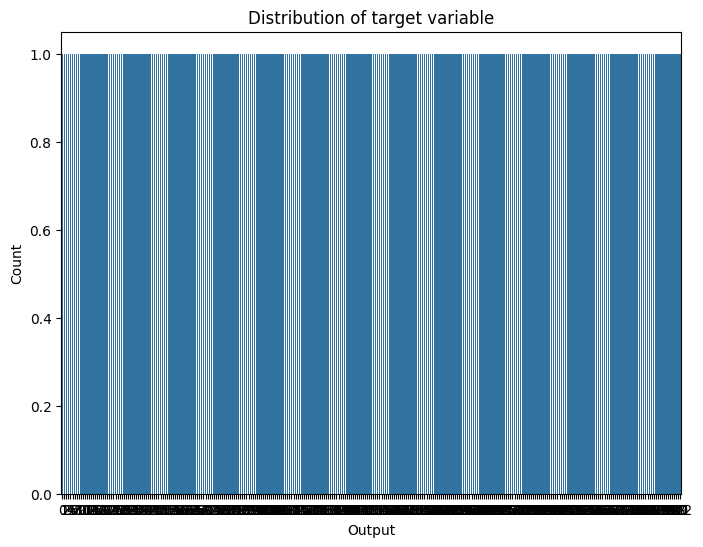

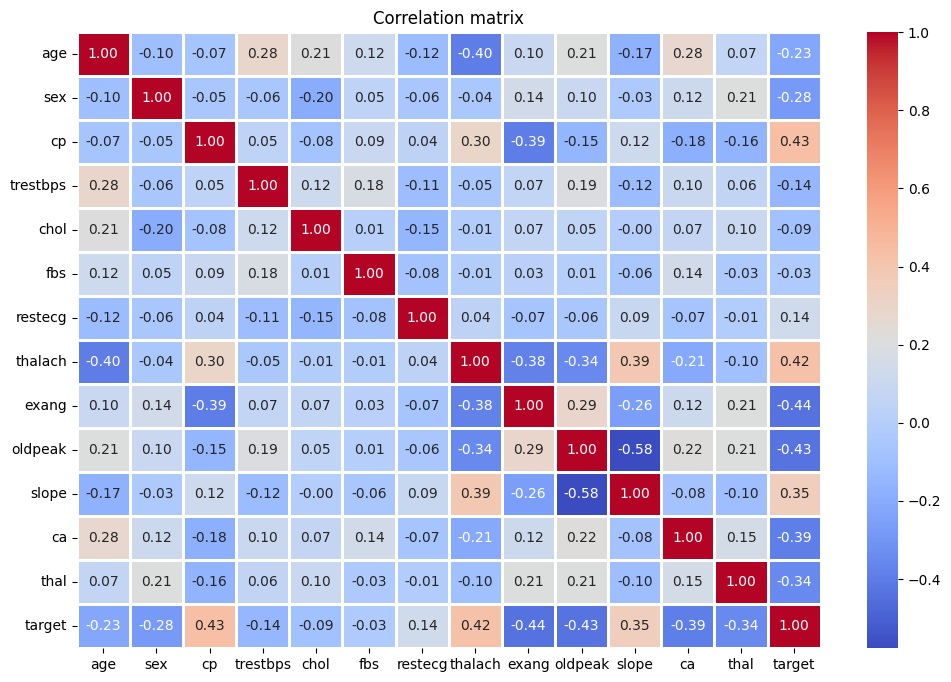

'\nData Transformation is a process of converting data from one form to another.\nData Transformation is done to make the data more suitable for analysis.\nData Transformation is done to make the data more suitable for modeling.\nData Transformation is done to make the data more suitable for visualization.\n'

In [34]:
'''
EDA is an analytical process to analyze and understand data before
building a heart disease classification model. The  EDA  stage  that  has  been  carried  out  results  in  the  analysis  of  2  types  of  analysis: 
univariate and multivariate. The diagram shows that the target data from the "no heart disease" 
sample is 53.9%. Meanwhile, the target data from the "heart disease" sample is 46.1%. It can be 
concluded that the dataset is not balanced. Multivariate analysis using  the Pearson correlation 
matrix aims to find the correlation between variables. The Pearson correlation matrix is shown 
in Figure 5. A value close to 0 indicates no linear relationship between two variables. The feature 
with  a low correlation with the target feature is "fbs" (fasting blood sugar). Two features are 
close  to  the  value  of  1,  namely  the  features  "ca"  (Number  of  major  vessels)  and  "thal" 
(Thalassemia).  These  two  features  show  a  strong  positive  linear  relationship  with  the  target 
feature. 
Figure 3. Visualization of y variable after value mapping 

'''
#EDA
import matplotlib.pyplot as plt
import seaborn as sns
#Distribution of target variable
plt.figure(figsize=(8, 6))
sns.countplot(df['target'])
plt.title('Distribution of target variable')
plt.xlabel('Output')
plt.ylabel('Count')
plt.show()

#Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)
plt.title('Correlation matrix')
plt.show()


'''
Data Transformation is a process of converting data from one form to another.
Data Transformation is done to make the data more suitable for analysis.
Data Transformation is done to make the data more suitable for modeling.
Data Transformation is done to make the data more suitable for visualization.
'''

# 4. Split Data

In [27]:
'''
    split data mebagi data menjadi data training dan data testing
    dimana 80% data training dan 20% data testing
'''
from sklearn.model_selection import train_test_split
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("===Data Training===")
print(X_train)
print("===Data Testing===")
print(X_test)



'''
    Feature scaling is a method used to standardize the range of independent variables or features of data.
    In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.
'''

===Data Training===
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
132   42    1   1       120   295    0        1      162      0      0.0   
202   58    1   0       150   270    0        0      111      1      0.8   
196   46    1   2       150   231    0        1      147      0      3.6   
75    55    0   1       135   250    0        0      161      0      1.4   
176   60    1   0       117   230    1        1      160      1      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
188   50    1   2       140   233    0        1      163      0      0.6   
71    51    1   2        94   227    0        1      154      1      0.0   
106   69    1   3       160   234    1        0      131      0      0.1   
270   46    1   0       120   249    0        0      144      0      0.8   
102   63    0   1       140   195    0        1      179      0      0.0   

     slope  ca  thal  
132      2   0     2  
202      2   0     3 

'\n    Feature scaling is a method used to standardize the range of independent variables or features of data.\n    In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.\n'

# 5. Synthetic Minority Over-sampling Technique (SMOTE)

In [28]:
'''
    SMOTE (Synthetic Minority Over Sampling Technique) is a technique used to solve the problem of imbalanced data.
    SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space,
    and drawing a new sample at a point along that line.
'''
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("===Data Training After SMOTE===")
print(X_train_smote)
print(y_train_smote)



'''
    Feature selection is the process of selecting a subset of relevant features for use in model construction.
    Feature selection techniques are used for several reasons:
    simplification of models to make them easier to interpret by researchers/users,
    shorter training times,
    to avoid the curse of dimensionality,
    enhanced generalization by reducing overfitting
'''

===Data Training After SMOTE===
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang   oldpeak  \
0     42    1   1       120   295    0        1      162      0  0.000000   
1     58    1   0       150   270    0        0      111      1  0.800000   
2     46    1   2       150   231    0        1      147      0  3.600000   
3     55    0   1       135   250    0        0      161      0  1.400000   
4     60    1   0       117   230    1        1      160      1  1.400000   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...       ...   
261   42    1   0       116   170    0        0      149      0  1.720834   
262   64    0   0       149   224    0        0      113      0  1.073445   
263   53    1   0       126   214    0        0      169      0  1.507966   
264   55    1   0       120   281    0        0      161      0  1.486667   
265   61    1   0       113   235    0        0      137      1  1.643431   

     slope  ca  thal  
0        2   0     2

'\n    Feature selection is the process of selecting a subset of relevant features for use in model construction.\n    Feature selection techniques are used for several reasons:\n    simplification of models to make them easier to interpret by researchers/users,\n    shorter training times,\n    to avoid the curse of dimensionality,\n    enhanced generalization by reducing overfitting\n'

# 6. Normalization

In [29]:
'''
    Normalization is the process of scaling individual samples to have unit norm.
    This process can be useful if you plan to use a quadratic form such as the dot-product or any other kernel to quantify the similarity of any pair of samples.
    StandardScaler is used to normalize the data.
'''
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train_smote)
X_test = scaler.transform(X_test)
print("===Data Training After Normalization===")
print(X_train_smote)
print("===Data Testing After Normalization===")
print(X_test)



'''
    Feature selection is the process of selecting a subset of relevant features for use in model construction.
    Feature selection techniques are used for several reasons:
    simplification of models to make them easier to interpret by researchers/users,
    shorter training times,
    to avoid the curse of dimensionality,
    enhanced generalization by reducing overfitting
'''

===Data Training After Normalization===
[[-1.41879538  0.69716104  0.06682268 ...  1.0141453  -0.72426744
  -0.53236372]
 [ 0.36612722  0.69716104 -0.92066799 ...  1.0141453  -0.72426744
   1.13362157]
 [-0.97256473  0.69716104  1.05431334 ... -0.64084028 -0.72426744
  -0.53236372]
 ...
 [-0.1916611   0.69716104 -0.92066799 ...  1.0141453   1.34729319
   1.13362157]
 [ 0.03145423  0.69716104 -0.92066799 ... -0.64084028 -0.72426744
  -0.53236372]
 [ 0.7008002   0.69716104 -0.92066799 ... -0.64084028  0.31151288
   1.13362157]]
===Data Testing After Normalization===
[[ 2.54569553e-01  6.97161043e-01 -9.20667990e-01  1.20290913e+00
   5.88476166e-01 -3.63200900e-01 -9.59088423e-01 -1.71186055e+00
   1.48486339e+00 -4.27823726e-01 -6.40840282e-01  3.11512876e-01
  -2.19834902e+00]
 [ 4.77684878e-01  6.97161043e-01  2.04180401e+00  2.41012977e+00
   8.22022843e-01 -3.63200900e-01 -9.59088423e-01  4.27451785e-01
  -6.73462629e-01 -7.95101088e-01 -6.40840282e-01 -7.24267436e-01
   1.13362157e

'\n    Feature selection is the process of selecting a subset of relevant features for use in model construction.\n    Feature selection techniques are used for several reasons:\n    simplification of models to make them easier to interpret by researchers/users,\n    shorter training times,\n    to avoid the curse of dimensionality,\n    enhanced generalization by reducing overfitting\n'

# 7. Classification using Deep Neural Network (DNN)

In [30]:
'''
    DNN (Deep Neural Network) is a type of artificial neural network with multiple layers between the input and output layers.
    The DNN finds the correct mathematical manipulation to turn the input into the output, whether it be a linear relationship or a non-linear relationship.
    The network moves through the layers calculating the probability of each output.
    Parameter = Value
    Number of layers = 8
    Number of neurons input layer = 64
    Number of neurons hidden layer 1 = 128
    Number of neurons hidden layer 2 = 256
    Number of neurons hidden layer 3 = 512
    Number of neurons hidden layer 4 = 256
    Number of neurons hidden layer 5 = 128
    Dropout rate = 0.5
    Number of neurons output layer = 1
    Regularization kernel L2 = 0.001
    Learning rate = 0.001
    Epochs = 50
    Batch size = 16
    Activation function = ReLU
    Optimizer = Adam
'''
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

# Define the model
model = Sequential()
model.add(Dense(64, input_dim=13, activation='relu'))  # Input layer
model.add(Dense(128, activation='relu'))              # Hidden layer 1
model.add(Dense(256, activation='relu'))              # Hidden layer 2
model.add(Dense(512, activation='relu'))              # Hidden layer 3
model.add(Dense(256, activation='relu'))              # Hidden layer 4
model.add(Dense(128, activation='relu'))              # Hidden layer 5
model.add(Dropout(0.5))                               # Dropout layer
model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.001)))  # Output layer

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',       # Metric to monitor
    patience=10,              # Number of epochs to wait for improvement
    restore_best_weights=True # Restore model to best weights
)

# Train the model with EarlyStopping
history = model.fit(
    X_train_smote, y_train_smote,  # Training data
    epochs=50,                     # Maximum number of epochs
    batch_size=16,                 # Batch size
    validation_data=(X_test, y_test),  # Validation data
    callbacks=[early_stopping]     # Add the EarlyStopping callback
)



'''
    The model evaluation is used to evaluate the model that has been created.
    The evaluation is done by comparing the model's prediction with the actual data.
'''


c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 338,177 (1.29 MB)

 Trainable params: 338,177 (1.29 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.5836 - loss: 0.6683 - val_accuracy: 0.8525 - val_loss: 0.4269
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8338 - loss: 0.4207 - val_accuracy: 0.8689 - val_loss: 0.3860
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8607 - loss: 0.3177 - val_accuracy: 0.8852 - val_loss: 0.3889
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8738 - loss: 0.3208 - val_accuracy: 0.8689 - val_loss: 0.4110
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9035 - loss: 0.2403 - val_accuracy: 0.8852 - val_loss: 0.5783
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9167 - loss: 0.1947 - val_accuracy: 0.8197 - val_loss: 0.6682
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9474 - loss: 0.1646 - val_accuracy: 0.8689 - val_loss: 0.6960
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9195 - loss: 0.1951 - val_accuracy: 0.8525 - val_los

"\n    The model evaluation is used to evaluate the model that has been created.\n    The evaluation is done by comparing the model's prediction with the actual data.\n"

# 8. Model Evaluation

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
===Confusion Matrix===
[[26  3]
 [ 5 27]]
===Classification Report===
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

===Overall Model Accuracy===
0.8688524590163934
===Class 1 Evaluation===
Precision: 0.9
Recall: 0.84375
===Class 0 Evaluation===
Precision: 0.8387096774193549
Recall: 0.896551724137931


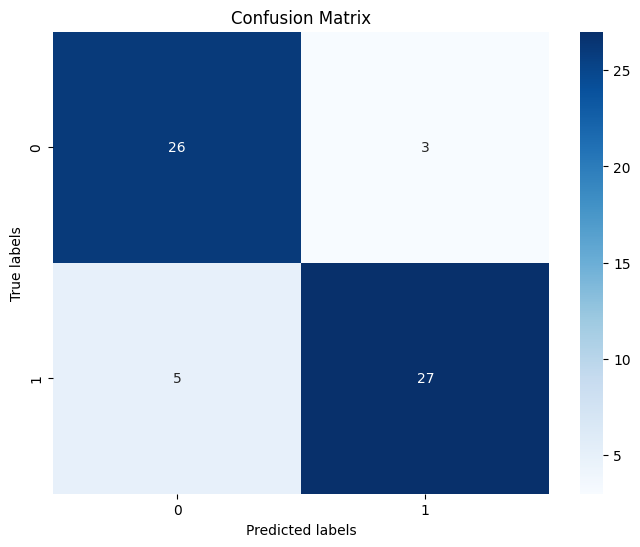

'\n    The ROC curve is a graphical representation of the true positive rate against the false positive rate.\n    It shows the tradeoff between sensitivity and specificity.\n    The ROC curve is useful because it shows, at a glance, the performance of a classification model.\n'

In [31]:
'''
    Model evaluation is the process of measuring the performance of a pre-trained model. This is
    important  to  understand  the  extent  to  which  the  model  can  perform  classification  accurately.
    Meanwhile, the confusion matrix is a table commonly used to describe model performance by
    comparing  model  predictions  with  the  actual  labels  on  the  test  dataset.
'''
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Predict the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("===Confusion Matrix===")
print(cm)

# Classification Report
print("===Classification Report===")
print(classification_report(y_test, y_pred))

# Overall model evaluation
accuracy = accuracy_score(y_test, y_pred)
print("===Overall Model Accuracy===")
print(accuracy)

# Evaluation for class 1
class_1_precision = cm[1, 1] / (cm[0, 1] + cm[1, 1])
class_1_recall = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print("===Class 1 Evaluation===")
print(f"Precision: {class_1_precision}")
print(f"Recall: {class_1_recall}")

# Evaluation for class 0
class_0_precision = cm[0, 0] / (cm[0, 0] + cm[1, 0])
class_0_recall = cm[0, 0] / (cm[0, 0] + cm[0, 1])
print("===Class 0 Evaluation===")
print(f"Precision: {class_0_precision}")
print(f"Recall: {class_0_recall}")

#using matplotlib to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()



'''
    The ROC curve is a graphical representation of the true positive rate against the false positive rate.
    It shows the tradeoff between sensitivity and specificity.
    The ROC curve is useful because it shows, at a glance, the performance of a classification model.
'''

# 9. Export Model

In [32]:
'''
    Exporting the model to a file is done to save the model that has been created.
'''
#model.save('model_heart_disease_classification.keras')
print("Model has been saved to model.keras")



'''
    The ROC curve is a graphical representation of the true positive rate against the false positive rate.
    It shows the tradeoff between sensitivity and specificity.
    The ROC curve is useful because it shows, at a glance, the performance of a classification model.
'''


Model has been saved to model.keras


'\n    The ROC curve is a graphical representation of the true positive rate against the false positive rate.\n    It shows the tradeoff between sensitivity and specificity.\n    The ROC curve is useful because it shows, at a glance, the performance of a classification model.\n'